In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Sit421/Desktop/final_final_travel_exploded.csv", on_bad_lines='skip')
df.head()

,Package Name,Page Url,Package Type,Company,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Onwards Return Flight Time,Price Per Two Persons,Per Person Price,Sightseeing Places Covered,Cancellation Rules,Traveling Days,Destination List,Destination Count,Flight Stops Encoded
0,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,02-10-2019,Lemon Tree Hotel Gangtok:4.2|Summit Alpine Re...,New Delhi,IndiGo,14 : 00-16 : 05,71350,35675.0,Baba Mandir | MG Road - Walk | Visit to Lake ...,Cancellation any time after making the 1st pay...,7,Gangtok,1,2
1,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,02-10-2019,Lemon Tree Hotel Gangtok:4.2|Summit Alpine Re...,New Delhi,IndiGo,14 : 00-16 : 05,71350,35675.0,Baba Mandir | MG Road - Walk | Visit to Lake ...,Cancellation any time after making the 1st pay...,7,Lachung,1,2
2,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,02-10-2019,Lemon Tree Hotel Gangtok:4.2|Summit Alpine Re...,New Delhi,IndiGo,14 : 00-16 : 05,71350,35675.0,Baba Mandir | MG Road - Walk | Visit to Lake ...,Cancellation any time after making the 1st pay...,7,Gangtok,1,2
3,A Grand Week in North East - Lachung Special,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...,Gangtok|Lachung|Gangtok|Darjeeling,02-10-2019,Lemon Tree Hotel Gangtok:4.2|Summit Alpine Re...,New Delhi,IndiGo,14 : 00-16 : 05,71350,35675.0,Baba Mandir | MG Road - Walk | Visit to Lake ...,Cancellation any time after making the 1st pay...,7,Darjeeling,1,2
4,A Relaxing holiday to Kerala - Free Speed Boat...,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...,Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar,02-10-2019,"Quality Airport Hotel:4.1|Hotel Hillview, Munn...",Mumbai,Spicejet|IndiGo,15 : 45-17 : 45|10 : 50-13 : 00,32864,16432.0,Dutch Palace | Jewish Synagogue | St. Francis...,Cancellation any time after making the 1st pay...,7,Cochin,1,2


In [3]:
df.columns

Index(['Package Name', 'Page Url', 'Package Type', 'Company', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Onwards Return Flight Time', 'Price Per Two Persons',
       'Per Person Price', 'Sightseeing Places Covered', 'Cancellation Rules',
       'Traveling Days', 'Destination List', 'Destination Count',
       'Flight Stops Encoded'],
      dtype='object')

In [5]:
print(df[['Destination List', 'Itinerary', 'Package Type']].head(20))

      Destination List                                          Itinerary  \
0              Gangtok  2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...   
1              Lachung  2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...   
2              Gangtok  2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...   
3           Darjeeling  2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darj...   
4               Cochin  1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...   
5               Munnar  1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...   
6             Thekkady  1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...   
7              Allepey  1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...   
8   Kovalam and Poovar  1N Cochin . 2N Munnar . 1N Thekkady . 1N Allep...   
9               Manali                                          3N Manali   
10             Gulmarg             1N Gulmarg . 2N Pahalgam . 2N Srinagar   
11            Pahalgam             1N Gulmarg . 2N Pahalgam . 2N Srinagar   

In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67883 entries, 0 to 67882
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Package Name                67883 non-null  object 
 1   Page Url                    67883 non-null  object 
 2   Package Type                67883 non-null  object 
 3   Company                     67883 non-null  object 
 4   Itinerary                   67883 non-null  object 
 5   Places Covered              67883 non-null  object 
 6   Travel Date                 67883 non-null  object 
 7   Hotel Details               67883 non-null  object 
 8   Start City                  67883 non-null  object 
 9   Airline                     67883 non-null  object 
 10  Onwards Return Flight Time  67883 non-null  object 
 11  Price Per Two Persons       67883 non-null  int64  
 12  Per Person Price            67883 non-null  float64
 13  Sightseeing Places Covered  678

Package Name                  0
Page Url                      0
Package Type                  0
Company                       0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Onwards Return Flight Time    0
Price Per Two Persons         0
Per Person Price              0
Sightseeing Places Covered    0
Cancellation Rules            0
Traveling Days                0
Destination List              0
Destination Count             0
Flight Stops Encoded          0
dtype: int64

In [7]:
df.shape

(67883, 19)

In [9]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2: Feature Engineering – Calculate travel days from itinerary
def extract_travel_days(itinerary):
    try:
        return sum([int(part.strip().split()[0][:-1]) for part in itinerary.split('.') if part.strip()])
    except:
        return 0

df["Traveling Days"] = df["Itinerary"].apply(extract_travel_days)

# Step 3: Features for ML
X = df[["Package Type", "Traveling Days", "Start City"]]
y = df[["Destination List", "Itinerary", "Hotel Details", "Airline", "Price Per Two Persons", "Sightseeing Places Covered"]]

# Step 4: Preprocessing
categorical_cols = ["Package Type", "Start City"]
numerical_cols = ["Traveling Days"]

preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ("num", "passthrough", numerical_cols)
])

# Step 5: Transform the features
X_transformed = preprocessor.fit_transform(X)

# Step 6: Fit NearestNeighbors
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X_transformed)

# Step 7: Recommend function
def recommend(package_type, days, start_city):
    input_df = pd.DataFrame([{
        "Package Type": package_type,
        "Traveling Days": days,
        "Start City": start_city
    }])
    
    input_transformed = preprocessor.transform(input_df)
    distances, indices = knn.kneighbors(input_transformed)

    recommendations = y.iloc[indices[0]]
    return recommendations.reset_index(drop=True)

# Step 8: Try it out
package_type = "Deluxe"
travel_days = 6
start_city = "Mumbai"

recommendations = recommend(package_type, travel_days, start_city)

print("\nTop 5 Travel Recommendations:\n")
print(recommendations.to_string(index=False))




Top 5 Travel Recommendations:

  Destination List                                        Itinerary                                                                                     Hotel Details         Airline  Price Per Two Persons                                                                                            Sightseeing Places Covered
         Kumarakom 2N Munnar . 2N Kumarakom . 2N Kovalam and Poovar                 Tea Village-MMT Holidays Special:3.4|Renai Green Fields:4.2|Poovar Island Resort: IndiGo|Spicejet                  33356  Mattupetty Dam | Tata Tea Museum | Pothamedu View Point | Eravikulam national park | Echo Point | Lakkam Waterfalls 
       Dharamshala      2N Dalhousie . 2N Dharamshala . 2N Amritsar Alps Resorts:4|Little Mastiff Dharamshala - Unit Of Pong View Hotel:3.9|Evoke Avaas Lifestyle:3.7   Go Air|IndiGo                  36835                                                                        Himachal - Convenience Value Pack - SUV - MMT 

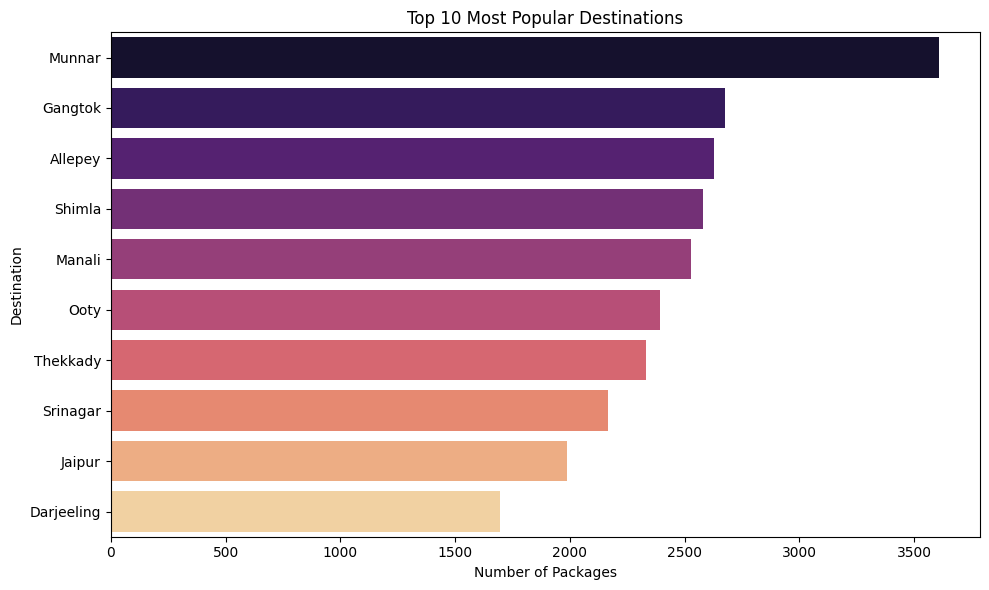

In [10]:
# We'll count how often each destination appears
top_dest = df["Destination List"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_dest.values, y=top_dest.index, palette="magma")
plt.title("Top 10 Most Popular Destinations")
plt.xlabel("Number of Packages")
plt.ylabel("Destination")
plt.tight_layout()
plt.show()


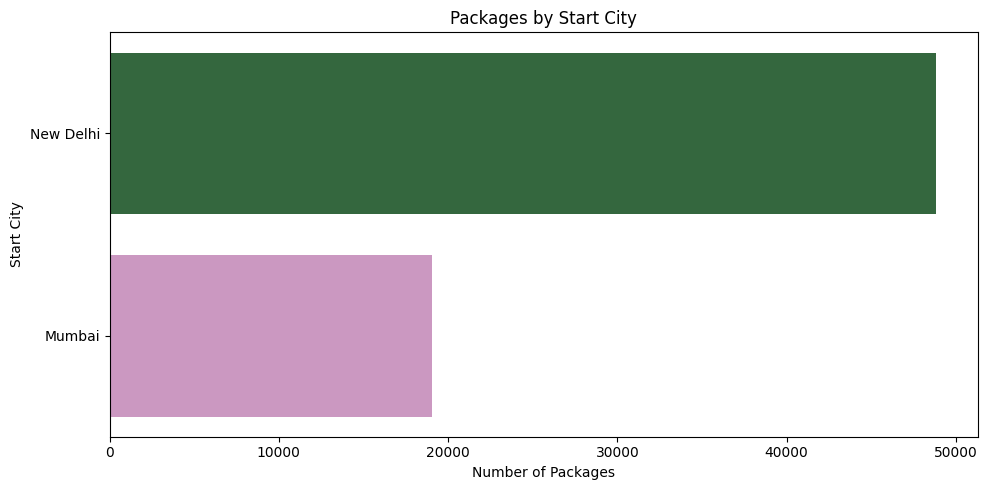

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Start City", order=df["Start City"].value_counts().index, palette="cubehelix")
plt.title("Packages by Start City")
plt.xlabel("Number of Packages")
plt.tight_layout()
plt.show()

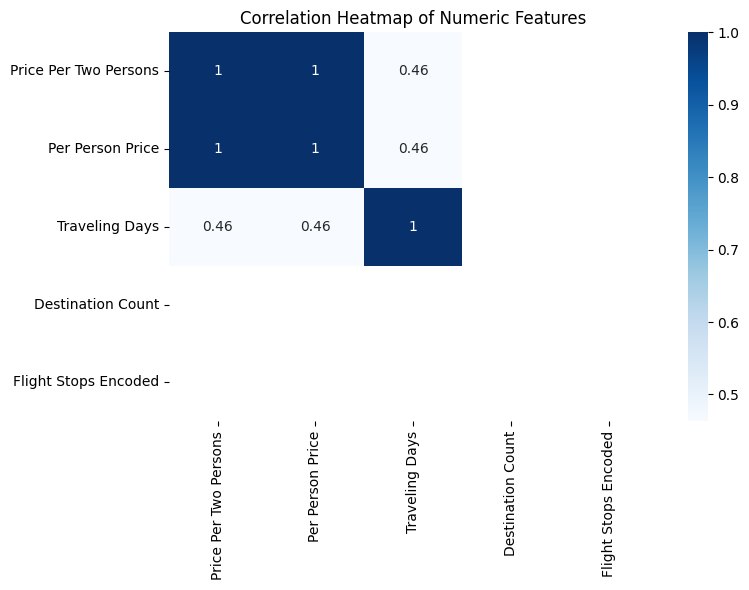

In [12]:
# Pick only numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


In [13]:
print(df[['Flight Stops Encoded', 'Start City', 'Airline', 'Destination List', 'Destination Count' ]].head())

   Flight Stops Encoded Start City          Airline Destination List  \
0                     2  New Delhi           IndiGo          Gangtok   
1                     2  New Delhi           IndiGo          Lachung   
2                     2  New Delhi           IndiGo          Gangtok   
3                     2  New Delhi           IndiGo       Darjeeling   
4                     2     Mumbai  Spicejet|IndiGo           Cochin   

   Destination Count  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.preprocessing import LabelEncoder

print("🔄 Loading dataset...")

# Step 1: Read the dataset
df = pd.read_csv("C:/Users/Sit421/Desktop/final_final_travel_exploded.csv", on_bad_lines='skip')

# Step 2: Clean column names
df.columns = df.columns.str.strip()

# Step 3: Drop rows with missing target
target = 'Per Person Price'
df = df.dropna(subset=[target])

# Step 4: Fill missing values in other columns with 'Unknown'
df = df.fillna('Unknown')

# Step 5: Reduce the number of categories for high-cardinality categorical columns
for col in df.select_dtypes(include='object').columns:
    value_counts = df[col].value_counts()
    # Limit categories to top 50 most frequent categories
    top_categories = value_counts.head(50).index
    df[col] = df[col].where(df[col].isin(top_categories), 'Other')

# Step 6: Encode categorical columns using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 7: Features and target
X = df.drop(columns=[target])
y = df[target]

# Step 8: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 10: Make predictions
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Step 12: Save model and columns
pickle.dump(model, open("travel_model.pkl", "wb"))
with open("model_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

# Step 13: Print results
print("📊 Model Results:")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")
print("💾 Model and columns saved.")


🔄 Loading dataset...
📊 Model Results:
✅ RMSE: 25.51
✅ R² Score: 1.0000
💾 Model and columns saved.


In [16]:
from sklearn.model_selection import cross_val_score

# Cross-validation to get a better idea of model's performance
scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-validated RMSE: {-scores.mean():.2f}")


Cross-validated RMSE: 136.53


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

gb_rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting RMSE: {gb_rmse:.2f}")
print(f"Gradient Boosting R² Score: {gb_r2:.4f}")


Gradient Boosting RMSE: 132.43
Gradient Boosting R² Score: 0.9999
